In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root='../PYTORCH_NOTEBOOKS/Data', train = True, download=True, transform = transform)

In [5]:
test_data = datasets.MNIST(root='../PYTORCH_NOTEBOOKS/Data', train = False, download=True, transform = transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../PYTORCH_NOTEBOOKS/Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../PYTORCH_NOTEBOOKS/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
for image,labels in train_data:
    break

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
labels

5

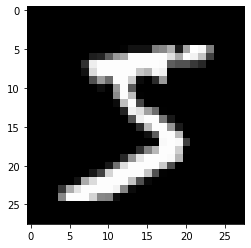

In [11]:
plt.imshow(image.reshape((28,28)), cmap='gray')

In [12]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=100, shuffle=True)
test_loader = DataLoader(test_data,batch_size=500, shuffle=False)

In [13]:
from torchvision.utils import make_grid

In [14]:
for images,labels in train_loader:
    break

In [15]:
images.shape

torch.Size([100, 1, 28, 28])

In [16]:
labels.shape

torch.Size([100])

In [17]:
labels[:10].numpy()

array([0, 5, 7, 8, 6, 7, 9, 7, 1, 3], dtype=int64)

Labels: [0 5 7 8 6 7 9 7 1 3]


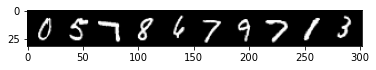

In [40]:
print("Labels:", labels[:10].numpy())

im = make_grid(images[:10], nrow=10)
plt.imshow(np.transpose(im.numpy(),(1,2,0))) #cwh--->whc

In [18]:
class ANNmnist(nn.Module):
    def __init__(self,in_sz,out_sz,layers):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)

    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x,dim=1)

In [19]:
torch.manual_seed(101)
model = ANNmnist(in_sz=28*28,out_sz=10,layers=[120,84])

In [20]:
model

ANNmnist(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [21]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [22]:
lost_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
images.shape

torch.Size([100, 1, 28, 28])

In [24]:
#flatten the images(100,784)

images.view(100,-1).shape

torch.Size([100, 784])

In [29]:
import time 
start_time = time.time()

train_loss = []
test_loss = []
train_correct = []
test_correct = []

epochs = 10
for i in range(epochs):
    
    trn_corr = 0
    test_corr = 0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(X_train.view(100,-1))
        loss = lost_function(y_pred, y_train)
        
        predicted = torch.max(y_pred.data,axis = 1)[1]
        batch_corr = (predicted==y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200==0:
            accuracy = trn_corr.item()/b
            print(f'epochs:{i} batch:{b} loss:{loss.item()} accuracy:{accuracy}')
            
    train_loss.append(loss)
    train_correct.append(trn_corr)
    
    #validation part:
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data,axis = 1)[1]
            batch_corr = (predicted==y_test).sum()
            test_corr += batch_corr
            
    loss1 = lost_function(y_val, y_test)
    test_loss.append(loss1)
    test_correct.append(test_corr)

total_time = time.time() - start_time
print(f"Duration: {total_time/60} mins")

epochs:0 batch:200 loss:0.3514518737792969 accuracy:82.675
epochs:0 batch:400 loss:0.32269009947776794 accuracy:87.3675
epochs:0 batch:600 loss:0.3131870627403259 accuracy:89.52166666666666
epochs:1 batch:200 loss:0.20233646035194397 accuracy:94.785
epochs:1 batch:400 loss:0.1410360187292099 accuracy:95.165
epochs:1 batch:600 loss:0.1297961175441742 accuracy:95.46
epochs:2 batch:200 loss:0.13938510417938232 accuracy:96.835
epochs:2 batch:400 loss:0.07277503609657288 accuracy:96.7675
epochs:2 batch:600 loss:0.038103945553302765 accuracy:96.865
epochs:3 batch:200 loss:0.09167168289422989 accuracy:97.6
epochs:3 batch:400 loss:0.06772997230291367 accuracy:97.5725
epochs:3 batch:600 loss:0.09116990119218826 accuracy:97.525
epochs:4 batch:200 loss:0.04778461530804634 accuracy:98.24
epochs:4 batch:400 loss:0.0716332420706749 accuracy:98.185
epochs:4 batch:600 loss:0.05064462125301361 accuracy:98.15166666666667
epochs:5 batch:200 loss:0.04246000200510025 accuracy:98.505
epochs:5 batch:400 loss

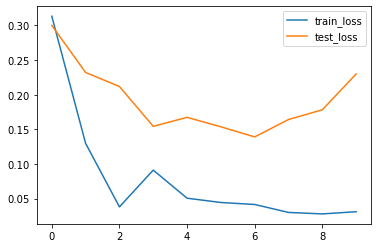

In [30]:
plt.plot(train_loss,label='train_loss')
plt.plot(test_loss,label='test_loss')
plt.legend()

In [32]:
train_acc = [training_data/600 for training_data in train_correct]
test_acc = [testing_data/100 for testing_data in test_correct]

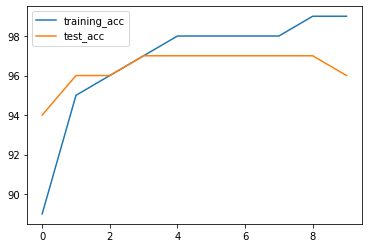

In [33]:
plt.plot(train_acc,label='training_acc')
plt.plot(test_acc,label='test_acc')
plt.legend()

In [34]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=True)

In [35]:
with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted==y_test).sum()

In [36]:
correct.item()

9696

In [37]:
torch.max(y_val,1)[1]

tensor([2, 0, 1,  ..., 5, 9, 5])

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
print(confusion_matrix(predicted.view(-1),y_test.view(-1)))

[[ 969    0    3    0    2    1    5    0    3    1]
 [   0 1128    2    0    0    0    3    5    0    4]
 [   2    1 1003    4    4    0    3    9    5    0]
 [   2    0    7  974    0    2    0    3   12    8]
 [   1    0    1    0  962    1    3    1    4   12]
 [   2    1    2   22    0  886   41    0   26   11]
 [   0    1    2    0    3    0  898    0    1    0]
 [   2    0    6    5    4    2    3 1005    7   11]
 [   1    4    6    2    1    0    2    1  912    3]
 [   1    0    0    3    6    0    0    4    4  959]]
